In [1]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import plotly.graph_objs as go

In [2]:
import pandas as pd
import numpy as np
df = pd.read_excel('books_variation.xlsx')
df.head()

,title,date,price
0,The Immortals of Meluha,2019-01-24,254
1,The Immortals of Meluha,2019-01-25,254
2,The Immortals of Meluha,2019-01-26,296
3,The Immortals of Meluha,2019-01-27,221
4,The Immortals of Meluha,2019-01-28,221


In [3]:
book1 = df.loc[df['title'] == 'The Secret of the Nagas']
book1 = book1.drop(columns='title')
book1

,date,price
14,2019-01-24,244
15,2019-01-25,199
16,2019-01-26,199
17,2019-01-27,188
18,2019-01-28,244
19,2019-01-29,220
20,2019-01-30,244
21,2019-01-31,244
22,2019-02-01,244
23,2019-02-02,244


In [4]:
book1['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)
indexed_book1 = book1.set_index(['date'])
indexed_book1.index

DatetimeIndex(['2019-01-24', '2019-01-25', '2019-01-26', '2019-01-27',
               '2019-01-28', '2019-01-29', '2019-01-30', '2019-01-31',
               '2019-02-01', '2019-02-02', '2019-02-03', '2019-02-04',
               '2019-02-05', '2019-02-06'],
              dtype='datetime64[ns]', name='date', freq=None)

In [5]:
data = [go.Scatter(x= indexed_book1.index, y= indexed_book1.price)]
plot(data, filename='basic-line')

C:\Users\Shefali\Anaconda3\lib\site-packages\plotly\offline\offline.py:635: UserWarning:

Your filename `basic-line` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\basic-line.html'

In [6]:
#Determining rolling statistics
rollmean = indexed_book1.rolling(window='14d').mean()  #monthly basis
rollstd = indexed_book1.rolling(window='14d').std()
rollmean, rollstd

(                 price
 date                  
 2019-01-24  244.000000
 2019-01-25  221.500000
 2019-01-26  214.000000
 2019-01-27  207.500000
 2019-01-28  214.800000
 2019-01-29  215.666667
 2019-01-30  219.714286
 2019-01-31  222.750000
 2019-02-01  225.111111
 2019-02-02  227.000000
 2019-02-03  225.181818
 2019-02-04  223.666667
 2019-02-05  222.384615
 2019-02-06  221.285714,                 price
 date                 
 2019-01-24        NaN
 2019-01-25  31.819805
 2019-01-26  25.980762
 2019-01-27  24.879711
 2019-01-28  27.031463
 2019-01-29  24.270696
 2019-01-30  24.608361
 2019-01-31  24.347191
 2019-02-01  23.850809
 2019-02-02  23.266571
 2019-02-03  22.881513
 2019-02-04  22.439143
 2019-02-05  21.975511
 2019-02-06  21.510028)

In [7]:
#Plotting Rolling Statistics

trace1 = go.Scatter(x= indexed_book1.index, y= indexed_book1.price, name='Original')
trace2 = go.Scatter(x= rollmean.index , y= rollmean.price, name= 'Rolling Mean')
trace3 = go.Scatter(x= rollstd.index , y= rollstd.price, name= 'Rolling Std')
data = [trace1, trace2, trace3]
    # Edit the layout
layout = dict(title = 'Rolling Mean and Standard Deviation',
              xaxis = dict(title = 'Date'),
              yaxis = dict(title = 'Price')
              )
fig = dict(data=data, layout=layout)
plot(fig, filename='styled-line')

C:\Users\Shefali\Anaconda3\lib\site-packages\plotly\offline\offline.py:635: UserWarning:

Your filename `styled-line` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\styled-line.html'

In [8]:
#Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(indexed_book1['price'], autolag='AIC')
dfout = pd.Series(dftest[0:4], index= ['Test statistic','p-value','lags used','number of observations used'])
for key,value in dftest[4].items():
    dfout['Critical value (%s)'%key] = value
print(dfout)


Test statistic                -0.000000
p-value                        0.958532
lags used                      8.000000
number of observations used    5.000000
Critical value (1%)           -6.045114
Critical value (5%)           -3.929280
Critical value (10%)          -2.986810
dtype: float64


C:\Users\Shefali\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1510: RuntimeWarning:

divide by zero encountered in double_scalars



In [9]:
#The test statistic is positive, meaning we are much less likely to reject the null hypothesis (it looks non-stationary).
#Comparing the test statistic to the critical values, it looks like we would have to fail to reject the null hypothesis 
#that the time series is non-stationary and does have time-dependent structure.

In [24]:
#log transform the dataset to make the distribution of values more linear and better meet the expectations of this statistical test

#indexed_book1_logscale = np.log(indexed_book1)

data = [go.Scatter(x= indexed_book1.index, y= indexed_book1.price)]
plot(data, filename='line-mode')

C:\Users\Shefali\Anaconda3\lib\site-packages\plotly\offline\offline.py:635: UserWarning:

Your filename `line-mode` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\line-mode.html'

In [25]:
# Moving Average with log timeseries

moving_avg = indexed_book1.rolling(window='14d').mean()
moving_std = indexed_book1.rolling(window='14d').std()
moving_avg, moving_std

(                 price
 date                  
 2019-01-24  244.000000
 2019-01-25  221.500000
 2019-01-26  214.000000
 2019-01-27  207.500000
 2019-01-28  214.800000
 2019-01-29  215.666667
 2019-01-30  219.714286
 2019-01-31  222.750000
 2019-02-01  225.111111
 2019-02-02  227.000000
 2019-02-03  225.181818
 2019-02-04  223.666667
 2019-02-05  222.384615
 2019-02-06  221.285714,                 price
 date                 
 2019-01-24        NaN
 2019-01-25  31.819805
 2019-01-26  25.980762
 2019-01-27  24.879711
 2019-01-28  27.031463
 2019-01-29  24.270696
 2019-01-30  24.608361
 2019-01-31  24.347191
 2019-02-01  23.850809
 2019-02-02  23.266571
 2019-02-03  22.881513
 2019-02-04  22.439143
 2019-02-05  21.975511
 2019-02-06  21.510028)

In [26]:
trace1 = go.Scatter(x= indexed_book1.index, y= indexed_book1.price)
trace2 = go.Scatter(x= moving_avg.index , y= moving_avg.price)
data = [trace1, trace2]
plot(data, filename='basic-line')


C:\Users\Shefali\Anaconda3\lib\site-packages\plotly\offline\offline.py:635: UserWarning:

Your filename `basic-line` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\basic-line.html'

In [27]:
#Difference between log timeseries and moving average

logminusMA = indexed_book1 - moving_avg
logminusMA

,price
date,
2019-01-24,0.000000
2019-01-25,-22.500000
2019-01-26,-15.000000
2019-01-27,-19.500000
2019-01-28,29.200000
2019-01-29,4.333333
2019-01-30,24.285714
2019-01-31,21.250000
2019-02-01,18.888889


In [28]:
#Determining the Stationarity of data

moving_avg = logminusMA.rolling(window='14d').mean()
moving_std = logminusMA.rolling(window='14d').std()
    
trace1 = go.Scatter(x= logminusMA.index, y= logminusMA.price, name='Original')
trace2 = go.Scatter(x= moving_avg.index , y= moving_avg.price, name= 'Rolling Mean')
trace3 = go.Scatter(x= moving_std.index , y= moving_std.price, name= 'Rolling Std')
data = [trace1, trace2, trace3]
    # Edit the layout
layout = dict(title = 'Rolling Mean and Standard Deviation',
              xaxis = dict(title = 'Date'),
              yaxis = dict(title = 'Price'))
fig = dict(data=data, layout=layout)
plot(fig, filename='styled-line')

C:\Users\Shefali\Anaconda3\lib\site-packages\plotly\offline\offline.py:635: UserWarning:

Your filename `styled-line` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\styled-line.html'

In [29]:
print("Results of Dickey-Fuller test: ")
dftest = adfuller(logminusMA['price'], autolag='AIC')
dfout = pd.Series(dftest[0:4], index= ['Test statistic','p-value','lags used','number of observations used'])
for key,value in dftest[4].items():
    dfout['Critical value (%s)'%key] = value
print(dfout)

Results of Dickey-Fuller test: 
Test statistic                -0.000000
p-value                        0.958532
lags used                      6.000000
number of observations used    7.000000
Critical value (1%)           -4.938690
Critical value (5%)           -3.477583
Critical value (10%)          -2.843868
dtype: float64


C:\Users\Shefali\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1510: RuntimeWarning:

divide by zero encountered in double_scalars



In [30]:
#If you notice above, the p-value 0.020828 is relatively less that before which was 0.958532
#Also, the Critical value and Test statistic value is almost equal which helps to determine whether data is stationary or not

# Here timeseries is stationary and null-hypothesis is rejected

In [31]:
#Calculate the weighted average to see the trend
#DataFrame.ewm : Provides exponential weighted functions

weighted_avg = indexed_book1.ewm(com=0.5).mean()
weighted_avg

,price
date,
2019-01-24,244.000000
2019-01-25,210.250000
2019-01-26,202.461538
2019-01-27,192.700000
2019-01-28,227.041322
2019-01-29,222.340659
2019-01-30,236.786825
2019-01-31,241.596341
2019-02-01,243.198862


In [33]:
trace1 = go.Scatter(x= indexed_book1.index, y= indexed_book1.price)
trace2 = go.Scatter(x= weighted_avg.index , y= weighted_avg.price)
data = [trace1, trace2]
plot(data, filename='basic-line')

#As you can see, the trend is moving with the logged data with respect to time

C:\Users\Shefali\Anaconda3\lib\site-packages\plotly\offline\offline.py:635: UserWarning:

Your filename `basic-line` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\basic-line.html'

In [34]:
#Difference between log timeseries and weighted average

logminusWA = indexed_book1 - weighted_avg
print(logminusWA)

#Determining the Stationarity of data

moving_avg = logminusWA.rolling(window='14d').mean()
moving_std = logminusWA.rolling(window='14d').std()
    
trace1 = go.Scatter(x= logminusWA.index, y= logminusWA.price, name='Original')
trace2 = go.Scatter(x= moving_avg.index , y= moving_avg.price, name= 'Rolling Mean')
trace3 = go.Scatter(x= moving_std.index , y= moving_std.price, name= 'Rolling Std')
data = [trace1, trace2, trace3]
    # Edit the layout
layout = dict(title = 'Rolling Mean and Standard Deviation',
              xaxis = dict(title = 'Date'),
              yaxis = dict(title = 'Price'))
fig = dict(data=data, layout=layout)
plot(fig, filename='styled-line')

                price
date                 
2019-01-24   0.000000
2019-01-25 -11.250000
2019-01-26  -3.461538
2019-01-27  -4.700000
2019-01-28  16.958678
2019-01-29  -2.340659
2019-01-30   7.213175
2019-01-31   2.403659
2019-02-01   0.801138
2019-02-02   0.267037
2019-02-03 -12.244183
2019-02-04  -4.081379
2019-02-05  -1.360458
2019-02-06  -0.453486


C:\Users\Shefali\Anaconda3\lib\site-packages\plotly\offline\offline.py:635: UserWarning:

Your filename `styled-line` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\styled-line.html'

In [35]:
print("Results of Dickey-Fuller test: ")
dftest = adfuller(logminusWA['price'], autolag='AIC')
dfout = pd.Series(dftest[0:4], index= ['Test statistic','p-value','lags used','number of observations used'])
for key,value in dftest[4].items():
    dfout['Critical value (%s)'%key] = value
print(dfout)

Results of Dickey-Fuller test: 
Test statistic                -1.935642
p-value                        0.315484
lags used                      5.000000
number of observations used    8.000000
Critical value (1%)           -4.665186
Critical value (5%)           -3.367187
Critical value (10%)          -2.802961
dtype: float64


In [36]:
# No difference in the p-value from original data and weighted average data
# Here timeseries is not stationary

In [37]:
#Shifting the values

indexed_book1_diffshift = indexed_book1 - indexed_book1.shift()
indexed_book1_diffshift = indexed_book1_diffshift.dropna()
data = [go.Scatter(x= indexed_book1_diffshift.index, y= indexed_book1_diffshift.price)]
plot(data, filename='basic-line')

C:\Users\Shefali\Anaconda3\lib\site-packages\plotly\offline\offline.py:635: UserWarning:

Your filename `basic-line` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\basic-line.html'

In [39]:
indexed_book1_diffshift.dropna(inplace=True)

#Determining the Stationarity of data

moving_avg = indexed_book1_diffshift.rolling(window='14d').mean()
moving_std = indexed_book1_diffshift.rolling(window='14d').std()
    
trace1 = go.Scatter(x= indexed_book1_diffshift.index, y= indexed_book1_diffshift.price, name='Original')
trace2 = go.Scatter(x= moving_avg.index , y= moving_avg.price, name= 'Rolling Mean')
trace3 = go.Scatter(x= moving_std.index , y= moving_std.price, name= 'Rolling Std')
data = [trace1, trace2, trace3]
    # Edit the layout
layout = dict(title = 'Rolling Mean and Standard Deviation',
              xaxis = dict(title = 'Date'),
              yaxis = dict(title = 'Price'))
fig = dict(data=data, layout=layout)
plot(fig, filename='styled-line')

C:\Users\Shefali\Anaconda3\lib\site-packages\plotly\offline\offline.py:635: UserWarning:

Your filename `styled-line` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\styled-line.html'

In [40]:
print("Results of Dickey-Fuller test: ")
dftest = adfuller(indexed_book1_diffshift['price'], autolag='AIC')
dfout = pd.Series(dftest[0:4], index= ['Test statistic','p-value','lags used','number of observations used'])
for key,value in dftest[4].items():
    dfout['Critical value (%s)'%key] = value
print(dfout)

# Here timeseries is stationary and null-hypothesis is rejected

Results of Dickey-Fuller test: 
Test statistic                -0.000000
p-value                        0.958532
lags used                      5.000000
number of observations used    7.000000
Critical value (1%)           -4.938690
Critical value (5%)           -3.477583
Critical value (10%)          -2.843868
dtype: float64


In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(indexed_book1)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

from plotly import tools

trace1 = go.Scatter(x= indexed_book1.index, y= indexed_book1.price, name='Original')
trace2 = go.Scatter(x= trend.index, y= trend.price, name='Trend')
trace3 = go.Scatter(x= seasonal.index, y= seasonal.price, name='Seasonality')
trace4 = go.Scatter(x= residual.index, y= residual.price, name='Residual')

fig = tools.make_subplots(rows=4, cols=1)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 3, 1)
fig.append_trace(trace4, 4, 1)


fig['layout'].update(title='Stacked subplots')
plot(fig, filename='stacked-subplots')

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]
[ (3,1) x3,y3 ]
[ (4,1) x4,y4 ]



C:\Users\Shefali\Anaconda3\lib\site-packages\plotly\offline\offline.py:635: UserWarning:

Your filename `stacked-subplots` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\stacked-subplots.html'

In [42]:
#Residuals are irregualr in nature
#So checking noise stationarity

decomposed_logdata = residual
decomposed_logdata.dropna(inplace=True)

#Determining the Stationarity of data

moving_avg = decomposed_logdata.rolling(window='14d').mean()
moving_std = decomposed_logdata.rolling(window='14d').std()
    
trace1 = go.Scatter(x= decomposed_logdata.index, y= decomposed_logdata.price, name='Original')
trace2 = go.Scatter(x= moving_avg.index , y= moving_avg.price, name= 'Rolling Mean')
trace3 = go.Scatter(x= moving_std.index , y= moving_std.price, name= 'Rolling Std')
data = [trace1, trace2, trace3]
    # Edit the layout
layout = dict(title = 'Rolling Mean and Standard Deviation',
              xaxis = dict(title = 'Date'),
              yaxis = dict(title = 'Price'))
fig = dict(data=data, layout=layout)
plot(fig, filename='styled-line')

C:\Users\Shefali\Anaconda3\lib\site-packages\plotly\offline\offline.py:635: UserWarning:

Your filename `styled-line` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\styled-line.html'

In [43]:
#ACF and PACF plots

from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(indexed_book1_diffshift)
lag_pacf = pacf(indexed_book1_diffshift)
#lag_acf,lag_pacf

#ACF
#trace1 = go.Scatter(y= lag_acf, name='Autocorrelation Function', type='bar')
trace1 = {"y": lag_acf, "name": "Autocorrelation Function", "type": "bar"}
trace2 = {"y": lag_pacf, "name": "Partial Autocorrelation Function", "type": "bar"}
#trace2 = go.Scatter(y= lag_pacf, name='Partial Autocorrelation Function', type='bar')

data = [trace1, trace2]
layout = dict(title = 'ACF and PACF Plots')
fig = dict(data=data, layout=layout)
plot(fig)

C:\Users\Shefali\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning:

invalid value encountered in sqrt

C:\Users\Shefali\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1275: RuntimeWarning:

invalid value encountered in double_scalars



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\temp-plot.html'

In [44]:
#AR Model
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(indexed_book1, order= (3,1,0))
results_AR = model.fit(disp=-1)

print("Plotting AR Model...")
trace1 = go.Scatter(x= indexed_book1.index, y= indexed_book1.price, name='Original')
trace2 = go.Scatter(y=results_AR.fittedvalues, name='AR fitted values')

data = [trace1, trace2]
layout = dict(title = 'RSS: %.4f'%sum((results_AR.fittedvalues-indexed_book1.price)**2))
fig = dict(data=data, layout=layout)
plot(fig)

C:\Users\Shefali\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Shefali\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Shefali\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\Shefali\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, w

Plotting AR Model...


'file://C:\\Users\\Shefali\\Desktop\\PY Work\\temp-plot.html'

In [45]:
#MA Model
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(indexed_book1, order= (0,1,1))
results_MA = model.fit(disp=-1)

print("Plotting MA Model...")
trace1 = go.Scatter(x= indexed_book1_diffshift.index, y= indexed_book1_diffshift.price, name='Original')
trace2 = go.Scatter(y=results_MA.fittedvalues, name='MA fitted values')

data = [trace1, trace2]
layout = dict(title = 'RSS: %.4f'%sum((results_MA.fittedvalues-indexed_book1_diffshift.price)**2))
fig = dict(data=data, layout=layout)
plot(fig)

C:\Users\Shefali\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Shefali\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Plotting MA Model...


'file://C:\\Users\\Shefali\\Desktop\\PY Work\\temp-plot.html'

In [46]:
#AR Model is better as it has less RSS value than MA Model

In [47]:
prediction = pd.Series(results_AR.fittedvalues, copy=True)
print(prediction)

prediction_cumsum = prediction.cumsum()
print(prediction_cumsum)

date
2019-01-25    -1.737728
2019-01-26    14.474867
2019-01-27    -9.088668
2019-01-28    12.940704
2019-01-29   -18.572852
2019-01-30    10.900711
2019-01-31   -26.349996
2019-02-01     5.768904
2019-02-02    -9.251611
2019-02-03    -2.573546
2019-02-04     7.493403
2019-02-05    -5.139472
2019-02-06     7.721805
dtype: float64
date
2019-01-25    -1.737728
2019-01-26    12.737139
2019-01-27     3.648471
2019-01-28    16.589174
2019-01-29    -1.983678
2019-01-30     8.917033
2019-01-31   -17.432963
2019-02-01   -11.664058
2019-02-02   -20.915669
2019-02-03   -23.489215
2019-02-04   -15.995812
2019-02-05   -21.135284
2019-02-06   -13.413479
dtype: float64


In [48]:
prediction_log = pd.Series(indexed_book1.price.ix[0], index = indexed_book1.index)
prediction_log = prediction_log.add(prediction_cumsum, fill_value=0)
prediction_log

C:\Users\Shefali\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



date
2019-01-24    244.000000
2019-01-25    242.262272
2019-01-26    256.737139
2019-01-27    247.648471
2019-01-28    260.589174
2019-01-29    242.016322
2019-01-30    252.917033
2019-01-31    226.567037
2019-02-01    232.335942
2019-02-02    223.084331
2019-02-03    220.510785
2019-02-04    228.004188
2019-02-05    222.864716
2019-02-06    230.586521
dtype: float64

In [49]:
prediction_ARIMA = np.exp(prediction_log)

trace1 = go.Scatter(x= indexed_book1.index, y= indexed_book1.price, name='Original data')
trace2 = go.Scatter(y=prediction_ARIMA, name='prdiction')

data = [trace1, trace2]
layout = dict(title = "Predictions")
fig = dict(data=data, layout=layout)
plot(fig)

'file://C:\\Users\\Shefali\\Desktop\\PY Work\\temp-plot.html'

In [53]:
prediction_ARIMA

date
2019-01-24    9.286533e+105
2019-01-25    1.633683e+105
2019-01-26    3.158805e+111
2019-01-27    3.567502e+107
2019-01-28    1.487443e+113
2019-01-29    1.277478e+105
2019-01-30    6.925832e+109
2019-01-31     2.493527e+98
2019-02-01    7.983943e+100
2019-02-02     7.661146e+96
2019-02-03     5.842746e+95
2019-02-04     1.049448e+99
2019-02-05     6.150585e+96
2019-02-06    1.388206e+100
dtype: float64

(array([204.42645426, 202.55311807, 200.31079534, 198.93352156,
        197.10046132, 195.55407342, 193.65737707]),
 array([21.18622986, 26.20478823, 32.05376774, 33.99996462, 37.19832566,
        39.31637263, 42.30343059]),
 array([[162.90220675, 245.95070176],
        [151.19267692, 253.91355922],
        [137.48656499, 263.13502568],
        [132.29481543, 265.57222769],
        [124.19308273, 270.0078399 ],
        [118.49539906, 272.61274778],
        [110.74417669, 276.57057745]]))

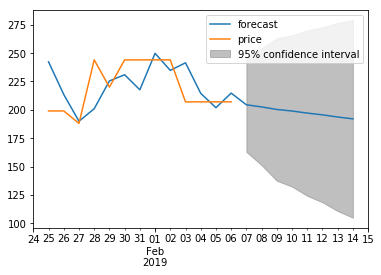

In [52]:
#forecast = results_AR.forecast(steps=7)
#print(results_AR.forecast(steps=7))

results_AR.plot_predict(1,21)
results_AR.forecast(steps=7)